# Exploring Cancer Incidence Data from CDC Wonder
Author: Pranshu Gupta

## Importing Packages

In [95]:
import os
import glob
import csv
import pandas as pd
import matplotlib.pyplot as plt
import json

## Preparing Data

In [96]:
directory = 'dataset/'
files = glob.glob(os.path.join(directory, '*.txt'))

print("Number of files: " + str(len(files)))

combinedRows = []

rowTitles = []
for file in files:
    with open(file, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        rowCount = 0
        for row in reader:
            if row[0] == "---":
                break
            if rowCount > 0:
                combinedRows.append(row)
            else:
                rowTitles = row
            rowCount += 1
    print("Processed file: " + file + ", with " + str(rowCount) + " rows")

combinedRows = [rowTitles] + combinedRows

df = pd.DataFrame(combinedRows[1:], columns=combinedRows[0])
print("Total number of rows: " + str(len(df)))
print(df.head())

df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df.to_csv('dataset/combined.csv', index=False)

Number of files: 21
Processed file: dataset/2002.txt, with 10748 rows
Processed file: dataset/2016.txt, with 12725 rows
Processed file: dataset/2017.txt, with 12604 rows
Processed file: dataset/2003.txt, with 11035 rows
Processed file: dataset/2015.txt, with 12669 rows
Processed file: dataset/2001.txt, with 10612 rows
Processed file: dataset/2014.txt, with 12570 rows
Processed file: dataset/2010.txt, with 12222 rows
Processed file: dataset/2004.txt, with 11270 rows
Processed file: dataset/2005.txt, with 11578 rows
Processed file: dataset/2011.txt, with 12269 rows
Processed file: dataset/2007.txt, with 11801 rows
Processed file: dataset/2013.txt, with 12449 rows
Processed file: dataset/2012.txt, with 12362 rows
Processed file: dataset/2006.txt, with 11706 rows
Processed file: dataset/2008.txt, with 12005 rows
Processed file: dataset/2020.txt, with 12069 rows
Processed file: dataset/2021.txt, with 12298 rows
Processed file: dataset/2009.txt, with 12138 rows
Processed file: dataset/2019.t

## Preliminary Analysis

    Year    Count
0   2001  1176041
1   2002  1190851
2   2003  1198321
3   2004  1218030
4   2005  1253632
5   2006  1288710
6   2007  1329720
7   2008  1349118
8   2009  1364825
9   2010  1359061
10  2011  1392694
11  2012  1381315
12  2013  1410488
13  2014  1434543
14  2015  1476828
15  2016  1499208
16  2017  1521420
17  2018  1551453
18  2019  1596413
19  2020  1427426
20  2021  1539337


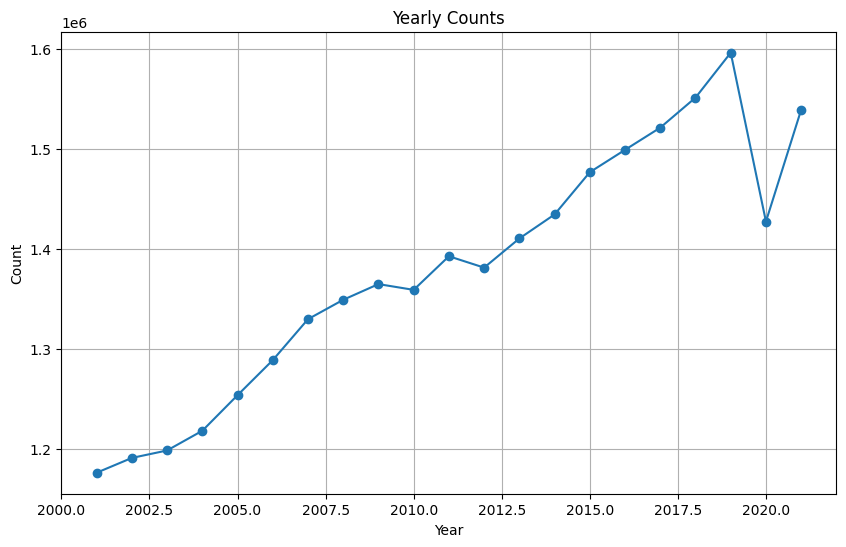

In [ ]:
total_cancer_by_site = df.groupby('Year')['Count'].sum().reset_index()
print(total_cancer_by_site)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(total_cancer_by_site['Year'], total_cancer_by_site['Count'], marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts')

# Show the plot
plt.grid(True)
plt.show()

    Year   Sex   Count
1   2001  Male  614330
3   2002  Male  624959
5   2003  Male  627077
7   2004  Male  637290
9   2005  Male  655012
11  2006  Male  678601
13  2007  Male  705058
15  2008  Male  706686
17  2009  Male  709203
19  2010  Male  704755
21  2011  Male  723590
23  2012  Male  699732
25  2013  Male  713239
27  2014  Male  721367
29  2015  Male  744882
31  2016  Male  759377
33  2017  Male  777538
35  2018  Male  793163
37  2019  Male  818436
39  2020  Male  730967
41  2021  Male  782076
    Year     Sex   Count
0   2001  Female  561711
2   2002  Female  565892
4   2003  Female  571244
6   2004  Female  580740
8   2005  Female  598620
10  2006  Female  610109
12  2007  Female  624662
14  2008  Female  642432
16  2009  Female  655622
18  2010  Female  654306
20  2011  Female  669104
22  2012  Female  681583
24  2013  Female  697249
26  2014  Female  713176
28  2015  Female  731946
30  2016  Female  739831
32  2017  Female  743882
34  2018  Female  758290
36  2019  Female  7

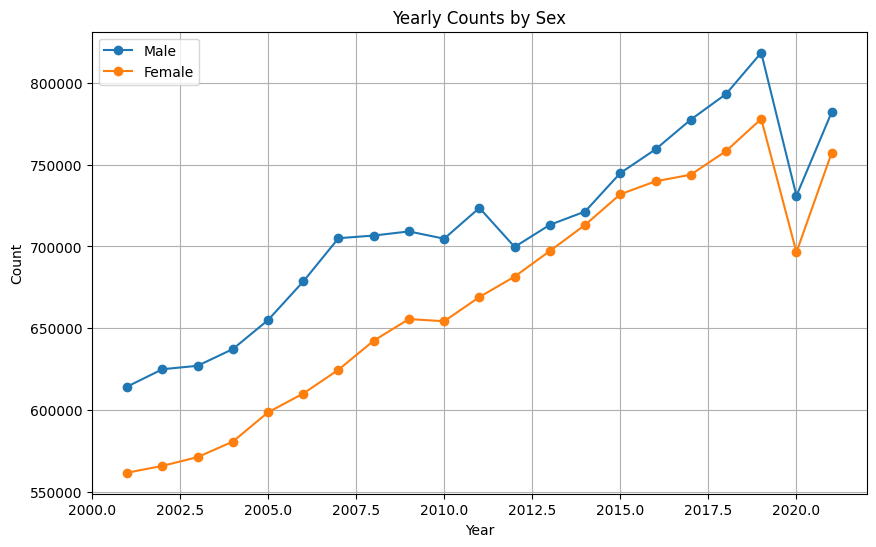

In [ ]:
total_cancer_by_site = df.groupby(['Year', 'Sex'])['Count'].sum().reset_index()
# Separate the data by 'Sex'
male_counts = total_cancer_by_site[total_cancer_by_site['Sex'] == 'Male']
female_counts = total_cancer_by_site[total_cancer_by_site['Sex'] == 'Female']

print(male_counts)
print(female_counts)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(male_counts['Year'], male_counts['Count'], marker='o', label='Male')
plt.plot(female_counts['Year'], female_counts['Count'], marker='o', label='Female')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts by Sex')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

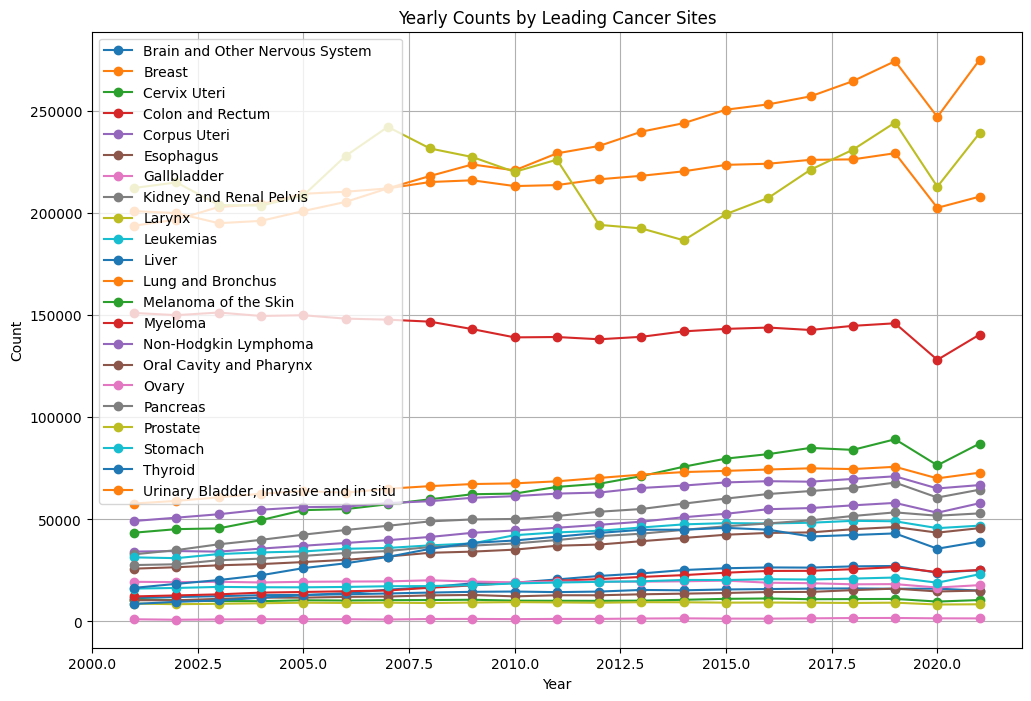

In [ ]:
# Group by 'Year' and 'Leading Cancer Sites' and sum the 'Count' column
total_cancer_by_site = df.groupby(['Year', 'Leading Cancer Sites'])['Count'].sum().reset_index()

# Get the unique 'Leading Cancer Sites' values
cancer_sites = total_cancer_by_site['Leading Cancer Sites'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = total_cancer_by_site[total_cancer_by_site['Leading Cancer Sites'] == site]
    curr_json = {
        'id': site,
        'data': [{'x': row['Year'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Year'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts by Leading Cancer Sites')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [100]:
print(json_data)

[{'id': 'Brain and Other Nervous System', 'data': [{'x': 2001, 'y': 11371}, {'x': 2002, 'y': 11952}, {'x': 2003, 'y': 12362}, {'x': 2004, 'y': 12847}, {'x': 2005, 'y': 12994}, {'x': 2006, 'y': 13273}, {'x': 2007, 'y': 13689}, {'x': 2008, 'y': 14130}, {'x': 2009, 'y': 14494}, {'x': 2010, 'y': 14639}, {'x': 2011, 'y': 14349}, {'x': 2012, 'y': 14619}, {'x': 2013, 'y': 15411}, {'x': 2014, 'y': 15240}, {'x': 2015, 'y': 15649}, {'x': 2016, 'y': 15849}, {'x': 2017, 'y': 16073}, {'x': 2018, 'y': 16151}, {'x': 2019, 'y': 15991}, {'x': 2020, 'y': 16052}, {'x': 2021, 'y': 15096}]}, {'id': 'Breast', 'data': [{'x': 2001, 'y': 201097}, {'x': 2002, 'y': 200143}, {'x': 2003, 'y': 195183}, {'x': 2004, 'y': 196318}, {'x': 2005, 'y': 201136}, {'x': 2006, 'y': 205601}, {'x': 2007, 'y': 212262}, {'x': 2008, 'y': 218328}, {'x': 2009, 'y': 223984}, {'x': 2010, 'y': 221072}, {'x': 2011, 'y': 229418}, {'x': 2012, 'y': 233042}, {'x': 2013, 'y': 240047}, {'x': 2014, 'y': 244218}, {'x': 2015, 'y': 250825}, {'x': 

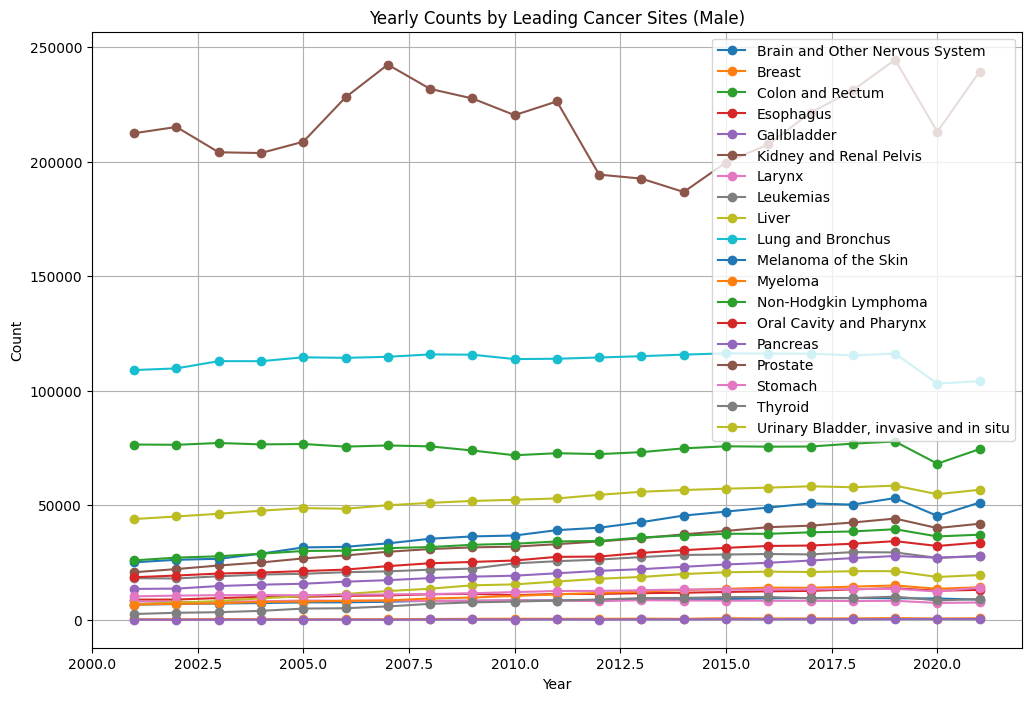

In [ ]:
# Group by 'Year' and 'Leading Cancer Sites' and sum the 'Count' column
total_cancer_by_site = df[df['Sex'] == 'Male'].groupby(['Year', 'Leading Cancer Sites'])['Count'].sum().reset_index()

# Get the unique 'Leading Cancer Sites' values
cancer_sites = total_cancer_by_site['Leading Cancer Sites'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = total_cancer_by_site[total_cancer_by_site['Leading Cancer Sites'] == site]
    curr_json = {
        'id': site,
        'data': [{'x': row['Year'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Year'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts by Leading Cancer Sites (Male)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [102]:
print(json_data)

[{'id': 'Brain and Other Nervous System', 'data': [{'x': 2001, 'y': 6615}, {'x': 2002, 'y': 6922}, {'x': 2003, 'y': 7115}, {'x': 2004, 'y': 7331}, {'x': 2005, 'y': 7611}, {'x': 2006, 'y': 7654}, {'x': 2007, 'y': 7886}, {'x': 2008, 'y': 8323}, {'x': 2009, 'y': 8276}, {'x': 2010, 'y': 8482}, {'x': 2011, 'y': 8482}, {'x': 2012, 'y': 8569}, {'x': 2013, 'y': 8942}, {'x': 2014, 'y': 8978}, {'x': 2015, 'y': 9075}, {'x': 2016, 'y': 9406}, {'x': 2017, 'y': 9529}, {'x': 2018, 'y': 9529}, {'x': 2019, 'y': 9430}, {'x': 2020, 'y': 9313}, {'x': 2021, 'y': 8833}]}, {'id': 'Breast', 'data': [{'x': 2001, 'y': 275}, {'x': 2002, 'y': 184}, {'x': 2003, 'y': 320}, {'x': 2004, 'y': 266}, {'x': 2005, 'y': 258}, {'x': 2006, 'y': 250}, {'x': 2007, 'y': 294}, {'x': 2008, 'y': 346}, {'x': 2009, 'y': 439}, {'x': 2010, 'y': 493}, {'x': 2011, 'y': 452}, {'x': 2012, 'y': 436}, {'x': 2013, 'y': 527}, {'x': 2014, 'y': 446}, {'x': 2015, 'y': 715}, {'x': 2016, 'y': 590}, {'x': 2017, 'y': 596}, {'x': 2018, 'y': 627}, {'x

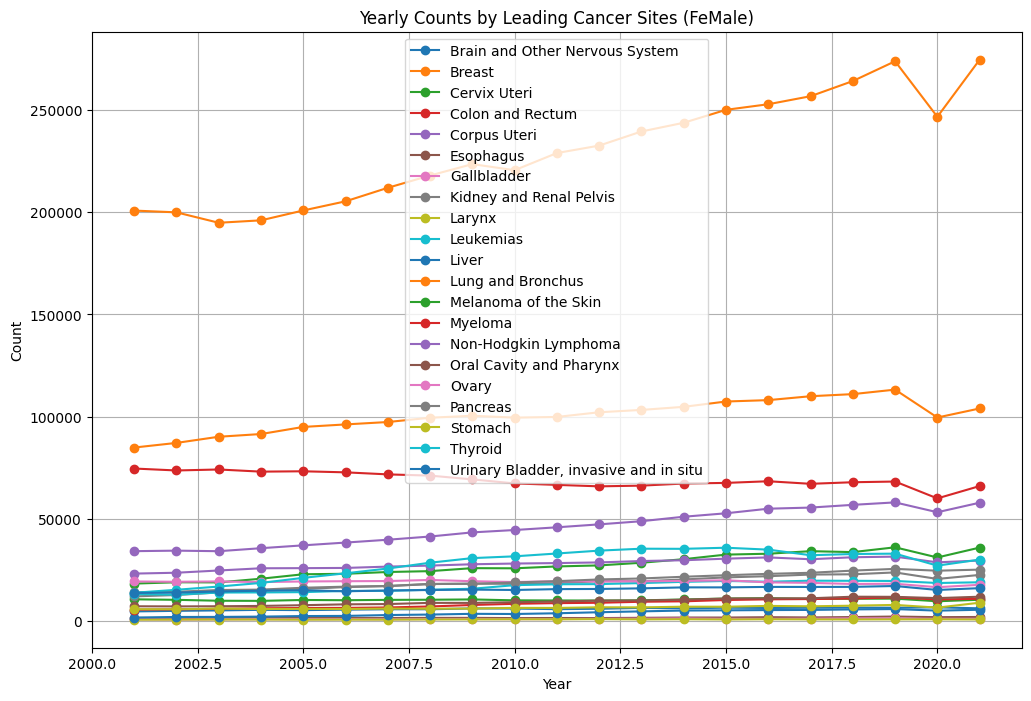

[{'id': 'Brain and Other Nervous System', 'data': [{'x': 2001, 'y': 4756}, {'x': 2002, 'y': 5030}, {'x': 2003, 'y': 5247}, {'x': 2004, 'y': 5516}, {'x': 2005, 'y': 5383}, {'x': 2006, 'y': 5619}, {'x': 2007, 'y': 5803}, {'x': 2008, 'y': 5807}, {'x': 2009, 'y': 6218}, {'x': 2010, 'y': 6157}, {'x': 2011, 'y': 5867}, {'x': 2012, 'y': 6050}, {'x': 2013, 'y': 6469}, {'x': 2014, 'y': 6262}, {'x': 2015, 'y': 6574}, {'x': 2016, 'y': 6443}, {'x': 2017, 'y': 6544}, {'x': 2018, 'y': 6622}, {'x': 2019, 'y': 6561}, {'x': 2020, 'y': 6739}, {'x': 2021, 'y': 6263}]}, {'id': 'Breast', 'data': [{'x': 2001, 'y': 200822}, {'x': 2002, 'y': 199959}, {'x': 2003, 'y': 194863}, {'x': 2004, 'y': 196052}, {'x': 2005, 'y': 200878}, {'x': 2006, 'y': 205351}, {'x': 2007, 'y': 211968}, {'x': 2008, 'y': 217982}, {'x': 2009, 'y': 223545}, {'x': 2010, 'y': 220579}, {'x': 2011, 'y': 228966}, {'x': 2012, 'y': 232606}, {'x': 2013, 'y': 239520}, {'x': 2014, 'y': 243772}, {'x': 2015, 'y': 250110}, {'x': 2016, 'y': 252841}, {

In [ ]:
# Group by 'Year' and 'Leading Cancer Sites' and sum the 'Count' column
total_cancer_by_site = df[df['Sex'] == 'Female'].groupby(['Year', 'Leading Cancer Sites'])['Count'].sum().reset_index()

# Get the unique 'Leading Cancer Sites' values
cancer_sites = total_cancer_by_site['Leading Cancer Sites'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = total_cancer_by_site[total_cancer_by_site['Leading Cancer Sites'] == site]
    curr_json = {
        'id': site,
        'data': [{'x': row['Year'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Year'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Counts by Leading Cancer Sites (FeMale)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(json_data)

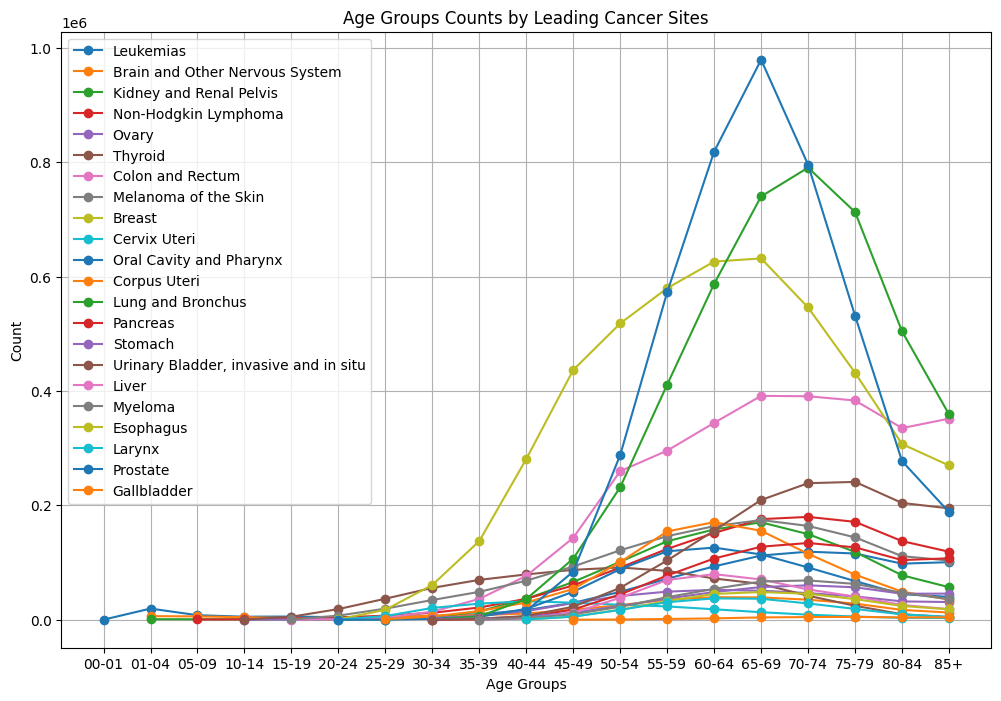

[{'id': 'Leukemias', 'data': [{'x': '00-01', 'y': 127}, {'x': '01-04', 'y': 19506}, {'x': '05-09', 'y': 7913}, {'x': '10-14', 'y': 5312}, {'x': '15-19', 'y': 5593}, {'x': '20-24', 'y': 4386}, {'x': '25-29', 'y': 4935}, {'x': '30-34', 'y': 6467}, {'x': '35-39', 'y': 9770}, {'x': '40-44', 'y': 16784}, {'x': '45-49', 'y': 29527}, {'x': '50-54', 'y': 48807}, {'x': '55-59', 'y': 71712}, {'x': '60-64', 'y': 93285}, {'x': '65-69', 'y': 112273}, {'x': '70-74', 'y': 119016}, {'x': '75-79', 'y': 115813}, {'x': '80-84', 'y': 98073}, {'x': '85+', 'y': 100644}]}, {'id': 'Brain and Other Nervous System', 'data': [{'x': '01-04', 'y': 6292}, {'x': '05-09', 'y': 5806}, {'x': '10-14', 'y': 4405}, {'x': '15-19', 'y': 2970}, {'x': '20-24', 'y': 2860}, {'x': '25-29', 'y': 4901}, {'x': '30-34', 'y': 6662}, {'x': '35-39', 'y': 8005}, {'x': '40-44', 'y': 10888}, {'x': '45-49', 'y': 17381}, {'x': '50-54', 'y': 25581}, {'x': '55-59', 'y': 35008}, {'x': '60-64', 'y': 39483}, {'x': '65-69', 'y': 38979}, {'x': '70

In [104]:
# Group by 'Year' and 'Leading Cancer Sites' and sum the 'Count' column
age_counts = df.groupby(['Age Groups Code', 'Leading Cancer Sites'])['Count'].sum().reset_index()

# Get the unique 'Leading Cancer Sites' values
cancer_sites = age_counts['Leading Cancer Sites'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = age_counts[age_counts['Leading Cancer Sites'] == site]
    curr_json = {
        'id': site,
        'data': [{'x': row['Age Groups Code'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Age Groups Code'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Groups Counts by Leading Cancer Sites')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(json_data)

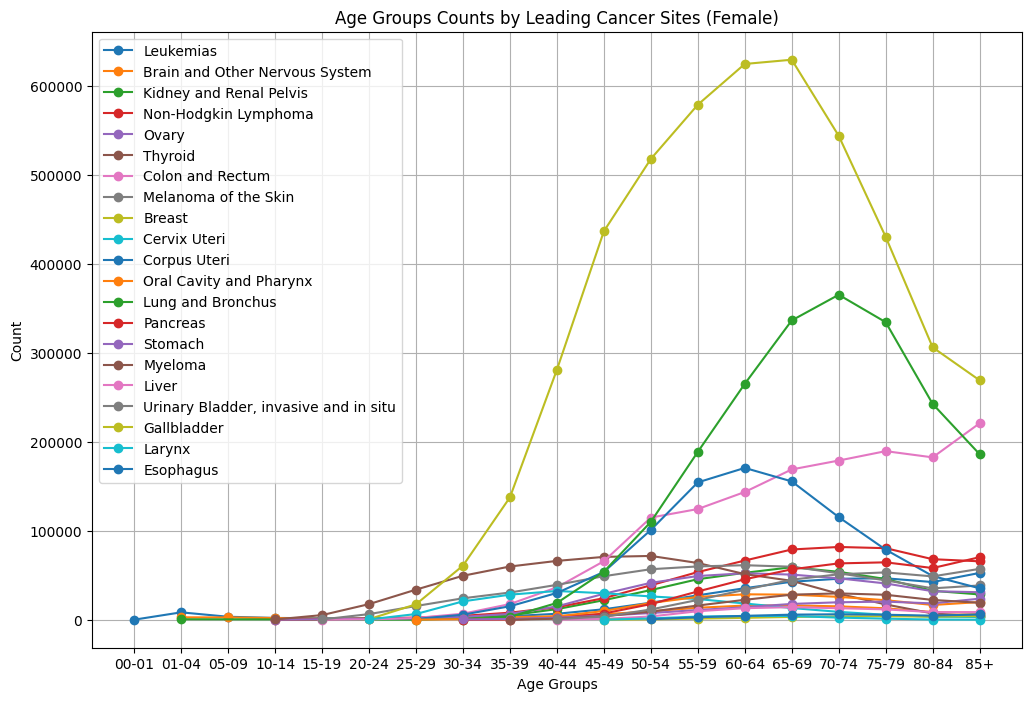

[{'id': 'Leukemias', 'data': [{'x': '00-01', 'y': 56}, {'x': '01-04', 'y': 8316}, {'x': '05-09', 'y': 3350}, {'x': '10-14', 'y': 2030}, {'x': '15-19', 'y': 1701}, {'x': '20-24', 'y': 1539}, {'x': '25-29', 'y': 1937}, {'x': '30-34', 'y': 2668}, {'x': '35-39', 'y': 3945}, {'x': '40-44', 'y': 6716}, {'x': '45-49', 'y': 11770}, {'x': '50-54', 'y': 19169}, {'x': '55-59', 'y': 27452}, {'x': '60-64', 'y': 35462}, {'x': '65-69', 'y': 42709}, {'x': '70-74', 'y': 46093}, {'x': '75-79', 'y': 46587}, {'x': '80-84', 'y': 42376}, {'x': '85+', 'y': 52638}]}, {'id': 'Brain and Other Nervous System', 'data': [{'x': '01-04', 'y': 2725}, {'x': '05-09', 'y': 2599}, {'x': '10-14', 'y': 1907}, {'x': '15-19', 'y': 1078}, {'x': '20-24', 'y': 1025}, {'x': '25-29', 'y': 1860}, {'x': '30-34', 'y': 2469}, {'x': '35-39', 'y': 2987}, {'x': '40-44', 'y': 3851}, {'x': '45-49', 'y': 6238}, {'x': '50-54', 'y': 9369}, {'x': '55-59', 'y': 13460}, {'x': '60-64', 'y': 15930}, {'x': '65-69', 'y': 16078}, {'x': '70-74', 'y':

In [105]:
# Group by 'Year' and 'Leading Cancer Sites' and sum the 'Count' column
age_counts = df[df['Sex'] == 'Female'].groupby(['Age Groups Code', 'Leading Cancer Sites'])['Count'].sum().reset_index()

# Get the unique 'Leading Cancer Sites' values
cancer_sites = age_counts['Leading Cancer Sites'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = age_counts[age_counts['Leading Cancer Sites'] == site]
    curr_json = {
        'id': site,
        'data': [{'x': row['Age Groups Code'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Age Groups Code'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Groups Counts by Leading Cancer Sites (Female)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(json_data)

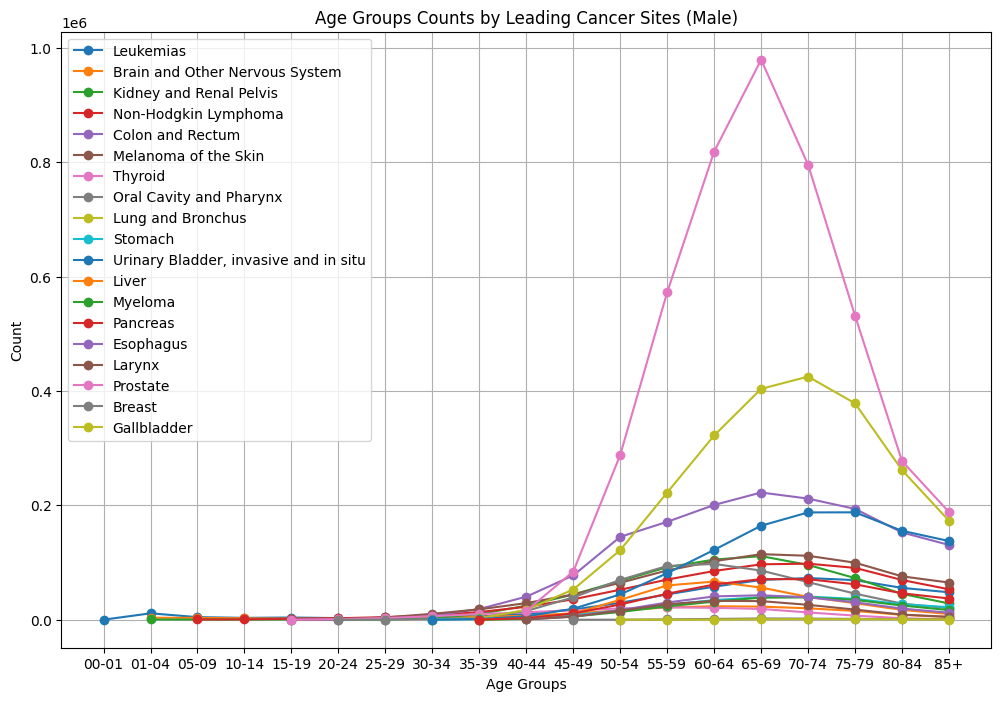

[{'id': 'Leukemias', 'data': [{'x': '00-01', 'y': 71}, {'x': '01-04', 'y': 11190}, {'x': '05-09', 'y': 4563}, {'x': '10-14', 'y': 3282}, {'x': '15-19', 'y': 3892}, {'x': '20-24', 'y': 2847}, {'x': '25-29', 'y': 2998}, {'x': '30-34', 'y': 3799}, {'x': '35-39', 'y': 5825}, {'x': '40-44', 'y': 10068}, {'x': '45-49', 'y': 17757}, {'x': '50-54', 'y': 29638}, {'x': '55-59', 'y': 44260}, {'x': '60-64', 'y': 57823}, {'x': '65-69', 'y': 69564}, {'x': '70-74', 'y': 72923}, {'x': '75-79', 'y': 69226}, {'x': '80-84', 'y': 55697}, {'x': '85+', 'y': 48006}]}, {'id': 'Brain and Other Nervous System', 'data': [{'x': '01-04', 'y': 3567}, {'x': '05-09', 'y': 3207}, {'x': '10-14', 'y': 2498}, {'x': '15-19', 'y': 1892}, {'x': '20-24', 'y': 1835}, {'x': '25-29', 'y': 3041}, {'x': '30-34', 'y': 4193}, {'x': '35-39', 'y': 5018}, {'x': '40-44', 'y': 7037}, {'x': '45-49', 'y': 11143}, {'x': '50-54', 'y': 16212}, {'x': '55-59', 'y': 21548}, {'x': '60-64', 'y': 23553}, {'x': '65-69', 'y': 22901}, {'x': '70-74', 

In [ ]:
# Group by 'age group' and 'Leading Cancer Sites' and sum the 'Count' column
age_counts = df[df['Sex'] == 'Male'].groupby(['Age Groups Code', 'Leading Cancer Sites'])['Count'].sum().reset_index()

# Get the unique 'Leading Cancer Sites' values
cancer_sites = age_counts['Leading Cancer Sites'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = age_counts[age_counts['Leading Cancer Sites'] == site]
    curr_json = {
        'id': site,
        'data': [{'x': row['Age Groups Code'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Age Groups Code'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Groups Counts by Leading Cancer Sites (Male)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(json_data)

   Age Groups Code    Count
0            00-01      127
1            01-04    26758
2            05-09    14130
3            10-14    10744
4            15-19    17019
5            20-24    39672
6            25-29   103931
7            30-34   226212
8            35-39   411601
9            40-44   776549
10           45-49  1371479
11           50-54  2255150
12           55-59  3197241
13           60-64  3952174
14           65-69  4431832
15           70-74  4108112
16           75-79  3442388
17           80-84  2468919
18             85+  2105396


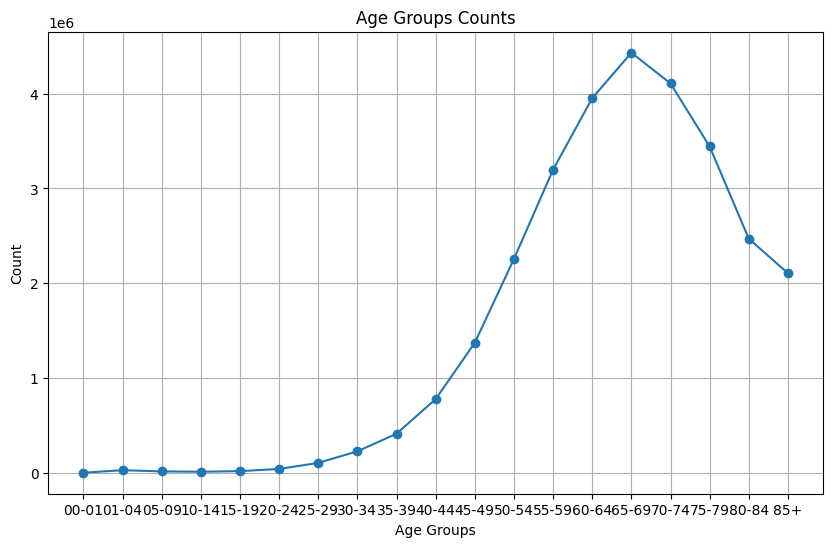

[{'id': 'Total', 'data': [{'x': '00-01', 'y': 127}, {'x': '01-04', 'y': 26758}, {'x': '05-09', 'y': 14130}, {'x': '10-14', 'y': 10744}, {'x': '15-19', 'y': 17019}, {'x': '20-24', 'y': 39672}, {'x': '25-29', 'y': 103931}, {'x': '30-34', 'y': 226212}, {'x': '35-39', 'y': 411601}, {'x': '40-44', 'y': 776549}, {'x': '45-49', 'y': 1371479}, {'x': '50-54', 'y': 2255150}, {'x': '55-59', 'y': 3197241}, {'x': '60-64', 'y': 3952174}, {'x': '65-69', 'y': 4431832}, {'x': '70-74', 'y': 4108112}, {'x': '75-79', 'y': 3442388}, {'x': '80-84', 'y': 2468919}, {'x': '85+', 'y': 2105396}]}]


In [107]:
age_counts = df.groupby('Age Groups Code')['Count'].sum().reset_index()
print(age_counts)

json_data = [
    {
        'id': 'Total',
        'data': [{'x': row['Age Groups Code'], 'y': row['Count']} for _, row in age_counts.iterrows()]
    }
]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(age_counts['Age Groups Code'], age_counts['Count'], marker='o')

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Groups Counts')

# Show the plot
plt.grid(True)
plt.show()

print(json_data)

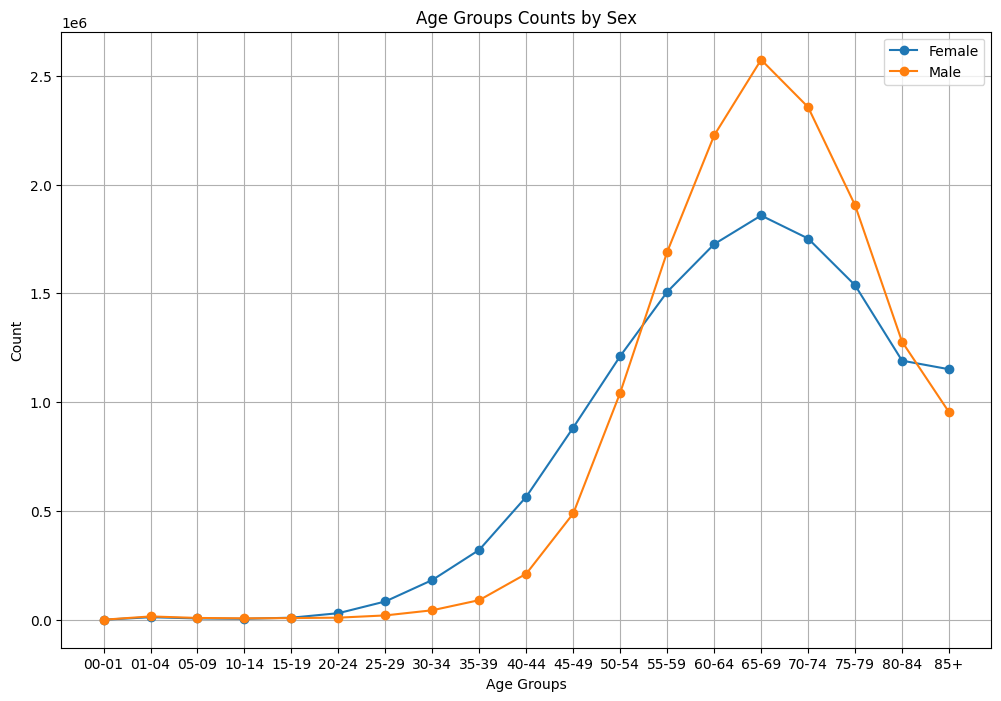

[{'id': 'Female', 'data': [{'x': '00-01', 'y': 56}, {'x': '01-04', 'y': 11586}, {'x': '05-09', 'y': 5949}, {'x': '10-14', 'y': 4340}, {'x': '15-19', 'y': 9385}, {'x': '20-24', 'y': 30112}, {'x': '25-29', 'y': 84082}, {'x': '30-34', 'y': 182680}, {'x': '35-39', 'y': 321427}, {'x': '40-44', 'y': 565225}, {'x': '45-49', 'y': 883096}, {'x': '50-54', 'y': 1211662}, {'x': '55-59', 'y': 1506774}, {'x': '60-64', 'y': 1726154}, {'x': '65-69', 'y': 1857949}, {'x': '70-74', 'y': 1752113}, {'x': '75-79', 'y': 1537363}, {'x': '80-84', 'y': 1190820}, {'x': '85+', 'y': 1151323}]}, {'id': 'Male', 'data': [{'x': '00-01', 'y': 71}, {'x': '01-04', 'y': 15172}, {'x': '05-09', 'y': 8181}, {'x': '10-14', 'y': 6404}, {'x': '15-19', 'y': 7634}, {'x': '20-24', 'y': 9560}, {'x': '25-29', 'y': 19849}, {'x': '30-34', 'y': 43532}, {'x': '35-39', 'y': 90174}, {'x': '40-44', 'y': 211324}, {'x': '45-49', 'y': 488383}, {'x': '50-54', 'y': 1043488}, {'x': '55-59', 'y': 1690467}, {'x': '60-64', 'y': 2226020}, {'x': '65-

In [ ]:
# Group by 'age group' and 'Sex' and sum the 'Count' column
age_counts = df.groupby(['Age Groups Code', 'Sex'])['Count'].sum().reset_index()

# Get the unique 'Sex' values
cancer_sites = age_counts['Sex'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = age_counts[age_counts['Sex'] == site]
    curr_json = {
        'id': site,
        'data': [{'x': row['Age Groups Code'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Age Groups Code'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Groups Counts by Sex')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(json_data)

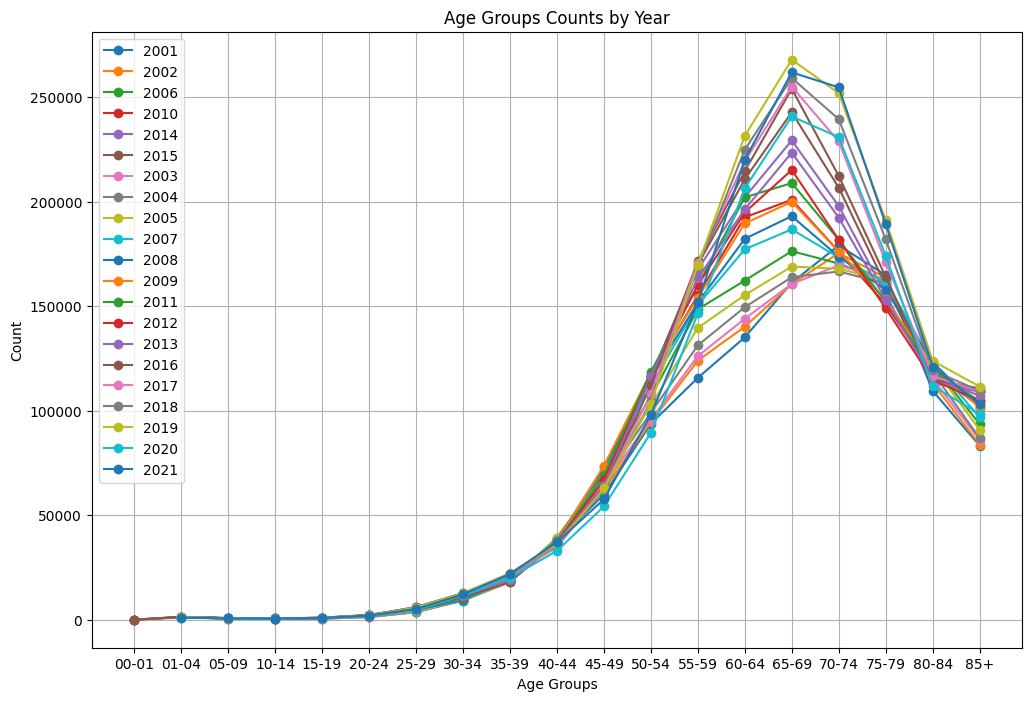

[{'id': '2001', 'data': [{'x': '00-01', 'y': 20}, {'x': '01-04', 'y': 1201}, {'x': '05-09', 'y': 659}, {'x': '10-14', 'y': 443}, {'x': '15-19', 'y': 531}, {'x': '20-24', 'y': 1248}, {'x': '25-29', 'y': 3671}, {'x': '30-34', 'y': 9181}, {'x': '35-39', 'y': 18650}, {'x': '40-44', 'y': 37571}, {'x': '45-49', 'y': 59903}, {'x': '50-54', 'y': 93802}, {'x': '55-59', 'y': 115761}, {'x': '60-64', 'y': 135144}, {'x': '65-69', 'y': 161305}, {'x': '70-74', 'y': 179135}, {'x': '75-79', 'y': 164928}, {'x': '80-84', 'y': 109590}, {'x': '85+', 'y': 83298}]}, {'id': '2002', 'data': [{'x': '00-01', 'y': 17}, {'x': '01-04', 'y': 1128}, {'x': '05-09', 'y': 688}, {'x': '10-14', 'y': 431}, {'x': '15-19', 'y': 599}, {'x': '20-24', 'y': 1381}, {'x': '25-29', 'y': 3724}, {'x': '30-34', 'y': 9258}, {'x': '35-39', 'y': 18208}, {'x': '40-44', 'y': 37692}, {'x': '45-49', 'y': 62152}, {'x': '50-54', 'y': 94591}, {'x': '55-59', 'y': 123967}, {'x': '60-64', 'y': 140253}, {'x': '65-69', 'y': 160571}, {'x': '70-74', '

In [ ]:
# Group by 'age group' and 'Year' and sum the 'Count' column
age_counts = df.groupby(['Age Groups Code', 'Year'])['Count'].sum().reset_index()

# Get the unique 'Year' values
cancer_sites = age_counts['Year'].unique()

# Plot the data
plt.figure(figsize=(12, 8))

json_data = []

for site in cancer_sites:
    site_counts = age_counts[age_counts['Year'] == site]
    curr_json = {
        'id': str(site),
        'data': [{'x': row['Age Groups Code'], 'y': row['Count']} for _, row in site_counts.iterrows()]
    }
    json_data += [curr_json]
    plt.plot(site_counts['Age Groups Code'], site_counts['Count'], marker='o', label=site)


# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Groups Counts by Year')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

print(json_data)

In [120]:
total_cancer_by_site = df.groupby('Leading Cancer Sites')['Count'].sum().reset_index()

json_data = [{'id': row['Leading Cancer Sites'], 'label': row['Leading Cancer Sites'], 'value': row['Count']} for _, row in total_cancer_by_site.iterrows()]
json_data = sorted(json_data, key=lambda x: x['value'], reverse=True)
print(json_data)

[{'id': 'Breast', 'label': 'Breast', 'value': 4845463}, {'id': 'Prostate', 'label': 'Prostate', 'value': 4551425}, {'id': 'Lung and Bronchus', 'label': 'Lung and Bronchus', 'value': 4486753}, {'id': 'Colon and Rectum', 'label': 'Colon and Rectum', 'value': 3027579}, {'id': 'Urinary Bladder, invasive and in situ', 'label': 'Urinary Bladder, invasive and in situ', 'value': 1434318}, {'id': 'Melanoma of the Skin', 'label': 'Melanoma of the Skin', 'value': 1400042}, {'id': 'Non-Hodgkin Lymphoma', 'label': 'Non-Hodgkin Lymphoma', 'value': 1294488}, {'id': 'Kidney and Renal Pelvis', 'label': 'Kidney and Renal Pelvis', 'value': 1092440}, {'id': 'Corpus Uteri', 'label': 'Corpus Uteri', 'value': 965921}, {'id': 'Leukemias', 'label': 'Leukemias', 'value': 869943}, {'id': 'Pancreas', 'label': 'Pancreas', 'value': 851799}, {'id': 'Oral Cavity and Pharynx', 'label': 'Oral Cavity and Pharynx', 'value': 767091}, {'id': 'Thyroid', 'label': 'Thyroid', 'value': 744933}, {'id': 'Liver', 'label': 'Liver',

In [121]:
total_cancer_by_site = df[df['Sex'] == 'Male'].groupby('Leading Cancer Sites')['Count'].sum().reset_index()

json_data = [{'id': row['Leading Cancer Sites'], 'label': row['Leading Cancer Sites'], 'value': row['Count']} for _, row in total_cancer_by_site.iterrows()]
json_data = sorted(json_data, key=lambda x: x['value'], reverse=True)
print(json_data)

[{'id': 'Prostate', 'label': 'Prostate', 'value': 4551425}, {'id': 'Lung and Bronchus', 'label': 'Lung and Bronchus', 'value': 2381193}, {'id': 'Colon and Rectum', 'label': 'Colon and Rectum', 'value': 1574491}, {'id': 'Urinary Bladder, invasive and in situ', 'label': 'Urinary Bladder, invasive and in situ', 'value': 1107361}, {'id': 'Melanoma of the Skin', 'label': 'Melanoma of the Skin', 'value': 827045}, {'id': 'Non-Hodgkin Lymphoma', 'label': 'Non-Hodgkin Lymphoma', 'value': 705635}, {'id': 'Kidney and Renal Pelvis', 'label': 'Kidney and Renal Pelvis', 'value': 700214}, {'id': 'Oral Cavity and Pharynx', 'label': 'Oral Cavity and Pharynx', 'value': 565844}, {'id': 'Leukemias', 'label': 'Leukemias', 'value': 513429}, {'id': 'Pancreas', 'label': 'Pancreas', 'value': 434977}, {'id': 'Liver', 'label': 'Liver', 'value': 327078}, {'id': 'Stomach', 'label': 'Stomach', 'value': 254738}, {'id': 'Esophagus', 'label': 'Esophagus', 'value': 237953}, {'id': 'Myeloma', 'label': 'Myeloma', 'value'

In [123]:
total_cancer_by_site = df[df['Sex'] == 'Female'].groupby('Leading Cancer Sites')['Count'].sum().reset_index()

json_data = [{'id': row['Leading Cancer Sites'], 'label': row['Leading Cancer Sites'], 'value': row['Count']} for _, row in total_cancer_by_site.iterrows()]
json_data = sorted(json_data, key=lambda x: x['value'], reverse=True)
print(json_data)

[{'id': 'Breast', 'label': 'Breast', 'value': 4835926}, {'id': 'Lung and Bronchus', 'label': 'Lung and Bronchus', 'value': 2105560}, {'id': 'Colon and Rectum', 'label': 'Colon and Rectum', 'value': 1453088}, {'id': 'Corpus Uteri', 'label': 'Corpus Uteri', 'value': 965921}, {'id': 'Thyroid', 'label': 'Thyroid', 'value': 590828}, {'id': 'Non-Hodgkin Lymphoma', 'label': 'Non-Hodgkin Lymphoma', 'value': 588853}, {'id': 'Melanoma of the Skin', 'label': 'Melanoma of the Skin', 'value': 572997}, {'id': 'Pancreas', 'label': 'Pancreas', 'value': 416822}, {'id': 'Ovary', 'label': 'Ovary', 'value': 401050}, {'id': 'Kidney and Renal Pelvis', 'label': 'Kidney and Renal Pelvis', 'value': 392226}, {'id': 'Leukemias', 'label': 'Leukemias', 'value': 356514}, {'id': 'Urinary Bladder, invasive and in situ', 'label': 'Urinary Bladder, invasive and in situ', 'value': 326957}, {'id': 'Cervix Uteri', 'label': 'Cervix Uteri', 'value': 219428}, {'id': 'Oral Cavity and Pharynx', 'label': 'Oral Cavity and Pharyn